In [32]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#loading the datasets
df = pd.read_csv('/content/car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
#to analysis  the data
df.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [ ]:
#total rows and columns
df.shape

(5512, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [ ]:
df.manufacture.unique()

In [ ]:
df.car_prices_in_rupee.unique()

array(['10.03 Lakh', '12.83 Lakh', '16.40 Lakh', ..., '28.90 Lakh',
       '64.90 Lakh', '31.90 Lakh'], dtype=object)

In [ ]:
df.kms_driven.unique()

array(['86,226 kms', '13,248 kms', '60,343 kms', ..., '1,54,000 kms',
       '79,718 kms', '85,002 kms'], dtype=object)

In [ ]:
df.engine.unique()

array(['1956 cc', '1330 cc', '2494 cc', '1199 cc', '1197 cc', '1498 cc',
       '1497 cc', '1368 cc', '1396 cc', '1373 cc', '1198 cc', '1462 cc',
       '799 cc', '998 cc', '1591 cc', '1999 cc', '999 cc', '814 cc',
       '796 cc', '1353 cc', '1451 cc', '1995 cc', '1991 cc', '2179 cc',
       '1798 cc', '1985 cc', '1968 cc', '2993 cc', '4134 cc', '1598 cc',
       '936 cc', '1248 cc', '2143 cc', '1086 cc', '1998 cc', '2198 cc',
       '2499 cc', '1496 cc', '1186 cc', '1582 cc', '1984 cc', '1997 cc',
       '1969 cc', '1493 cc', '2755 cc', '1196 cc', '2953 cc', '2184 cc',
       '1461 cc', '2987 cc', '1950 cc', '1395 cc', '2523 cc', '1193 cc',
       '1061 cc', '1298 cc', '1586 cc', '993 cc', '2354 cc', '1405 cc',
       '2967 cc', '0 cc', '2694 cc', '2696 cc', '2609 cc', '2998 cc',
       '2477 cc', '2393 cc', '2982 cc', '2199 cc', '1799 cc', '3198 cc',
       '1194 cc', '2997 cc', '1495 cc', '1794 cc', '2498 cc', '1364 cc',
       '1388 cc', '2596 cc', '1173 cc', '1797 cc', '1499 cc',

In [ ]:
df.Seats.unique()

array(['5 Seats', '6 Seats', '7 Seats', '4 Seats', '8 Seats', '2 Seats'],
      dtype=object)

In [ ]:
df.fuel_type.unique()

array(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'], dtype=object)

In [ ]:
# Preprocessing
backup = df.copy()

In [ ]:
#cleaning the car prices
car = df[df['car_prices_in_rupee'] != "Ask For Price"]

In [43]:
df.car_prices_in_rupee.head()

46    43
47     6
48    27
57    14
58    15
Name: car_prices_in_rupee, dtype: int64

In [ ]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace('[^0-9.]', '', regex=True)

In [45]:
df.car_prices_in_rupee

46      43
47       6
48      27
57      14
58      15
        ..
5475    62
5478    53
5479    67
5485    42
5487    44
Name: car_prices_in_rupee, Length: 830, dtype: int64

In [46]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    object
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   ownership            830 non-null    object
 7   manufacture          830 non-null    int64 
 8   engine               830 non-null    object
 9   Seats                830 non-null    object
dtypes: int64(3), object(7)
memory usage: 71.3+ KB


In [ ]:
df = df[df['car_prices_in_rupee'].str.isdigit()]
df.car_prices_in_rupee.head()

46    43
47     6
48    27
57    14
58    15
Name: car_prices_in_rupee, dtype: object

In [50]:
df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

46       61000
47       65392
48       37000
57       50000
58      105241
         ...  
5475     17000
5478      9000
5479      9000
5485      3000
5487     44000
Name: kms_driven, Length: 830, dtype: object

In [53]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [62]:
df['car_name'].str.split(' ').str.slice(0,3).str.join(' ')

46                         BMW 5 Series
47                      Hyundai i20 1.4
48                Mercedes-Benz CLA 200
57                     Jeep Compass 1.4
58                        Volvo XC60 D4
                     ...               
5475              Mercedes-Benz GLC 200
5478            Mercedes-Benz C-Class C
5479             Jaguar F-Pace Prestige
5485    Mercedes-Benz A-Class Limousine
5487    Mercedes-Benz E-Class Exclusive
Name: car_name, Length: 830, dtype: object

In [64]:
df.reset_index(drop = True)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,46,BMW 5 Series 520d Luxury Line,43,61000,Diesel,Automatic,1st Owner,2019,1995 cc,5 Seats
1,47,Hyundai i20 1.4 Magna Executive,6,65392,Diesel,Manual,1st Owner,2017,1396 cc,5 Seats
2,48,Mercedes-Benz CLA 200 CGI Sport,27,37000,Petrol,Automatic,1st Owner,2018,1991 cc,5 Seats
3,57,Jeep Compass 1.4 Sport,14,50000,Petrol,Manual,1st Owner,2018,1368 cc,5 Seats
4,58,Volvo XC60 D4 Summum,15,105241,Diesel,Automatic,1st Owner,2015,1985 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
825,5475,Mercedes-Benz GLC 200,62,17000,Petrol,Automatic,1st Owner,2021,3996 cc,4 Seats
826,5478,Mercedes-Benz C-Class C 220d,53,9000,Diesel,Automatic,0th Owner,2022,1462 cc,5 Seats
827,5479,Jaguar F-Pace Prestige 2.0 Petrol,67,9000,Petrol,Automatic,1st Owner,2021,1950 cc,7 Seats
828,5485,Mercedes-Benz A-Class Limousine A 200,42,3000,Petrol,Automatic,1st Owner,2022,1999 cc,5 Seats


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    int64 
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   ownership            830 non-null    object
 7   manufacture          830 non-null    int64 
 8   engine               830 non-null    object
 9   Seats                830 non-null    object
dtypes: int64(4), object(6)
memory usage: 71.3+ KB


In [72]:

del df['Seats']

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    int64 
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   ownership            830 non-null    object
 7   manufacture          830 non-null    int64 
 8   engine               830 non-null    object
dtypes: int64(4), object(5)
memory usage: 64.8+ KB


In [80]:
# Check if 'Unnamed' column exists
if 'Unnamed' in df.columns:
    # Delete the 'Unnamed' column
    del df['Unnamed']
else:
    # Print a message if the column does not exist
    print("Column 'Unnamed' does not exist in the DataFrame.")

# Print the DataFrame information
df.info()

Column 'Unnamed' does not exist in the DataFrame.
<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    int64 
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   ownership            830 non-null    object
 7   manufacture          830 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 58.4+ KB


In [84]:
del df['ownership']

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    int64 
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   manufacture          830 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 51.9+ KB


In [73]:
df.shape

(830, 9)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [88]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 1027 to 837
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           581 non-null    int64 
 1   car_name             581 non-null    object
 2   car_prices_in_rupee  581 non-null    int64 
 3   kms_driven           581 non-null    int64 
 4   fuel_type            581 non-null    object
 5   transmission         581 non-null    object
dtypes: int64(3), object(3)
memory usage: 31.8+ KB


In [89]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [92]:
X_train["car_name"].value_counts()

car_name
BMW 5 Series 520d Luxury Line               10
BMW X5 xDrive 30d xLine                      7
Mercedes-Benz GLE 250d                       6
Jaguar XF 2.0 Petrol Prestige                6
Mercedes-Benz C-Class Progressive C 220d     6
                                            ..
Ford Figo 1.5D Base MT                       1
Mahindra Marazzo M8 8Str                     1
Hyundai i20 Asta 1.4 CRDi (Diesel)           1
Maruti Wagon R LX Minor Duo LPG              1
Mercedes-Benz GLA Class 200                  1
Name: count, Length: 400, dtype: int64

In [93]:
make_train = X_train["car_name"].str.split(" ", expand = True)
make_test = X_test["car_name"].str.split(" ", expand = True)

In [94]:
X_train["manufacturer"] = make_train[0]
X_test["manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

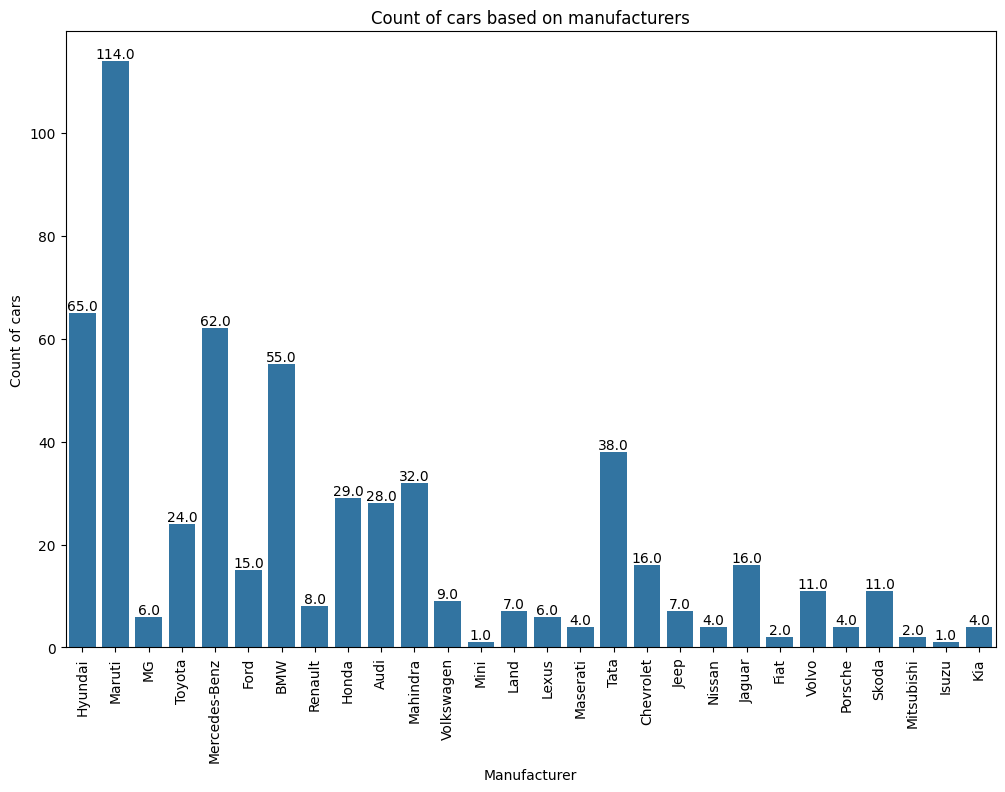

In [ ]:
# Check if the variable 'Manufacturer' exists in the X_train DataFrame
if 'Manufacturer' not in X_train.columns:
    # If the variable does not exist, create it
    X_train["Manufacturer"] = make_train[0]
    X_test["Manufacturer"] = make_test[0]

# Plot the count of cars based on manufacturers
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [95]:
# Change the variable name to 'kms_driven'
X_train["kms_driven"]

1027    120426
1907     90000
1547     12023
1486     20000
5463     85002
         ...  
523      52481
853       7500
1769     15000
2763     26000
837      49000
Name: kms_driven, Length: 581, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 46 to 5487
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           830 non-null    int64 
 1   car_name             830 non-null    object
 2   car_prices_in_rupee  830 non-null    int64 
 3   kms_driven           830 non-null    int64 
 4   fuel_type            830 non-null    object
 5   transmission         830 non-null    object
 6   manufacture          830 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 51.9+ KB
